### Prever peso de peixes com base nos seus atributos

O objetivo desse estudo é prever o peso dos peixes utilizando Regressão Linear com base nas suas dimensões

https://www.kaggle.com/datasets/aungpyaeap/fish-market

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
import os
from scipy import stats

In [2]:
os.getcwd()

'c:\\FCD\\Projects\\Fish_Weight'

In [3]:
data = pd.read_csv('Fish.csv')
df = data.copy()

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.sample(8)

,Species,Weight,Length1,Length2,Length3,Height,Width
114,Perch,700.0,34.5,37.0,39.4,10.8350,6.2646
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
82,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
135,Pike,510.0,40.0,42.5,45.5,6.8250,4.4590
119,Perch,850.0,36.9,40.0,42.3,11.9286,7.1064
92,Perch,150.0,20.5,22.5,24.0,6.7920,3.6240
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992


#### Significado das colunas ####


Weight: Peso do peixe em gramas

Length1: comprimento vertical em cm

Length2: comprimento diagnonal em cm

Length3: comprimento cruzado em cm

Height: altura em cm

Width: largura diagonal em cm

In [6]:
# Renomeando as colunas para melhor visualização
df.rename(columns = {'Weight': 'Peso', 'Length1': 'CompVertical',
                     'Length2':'CompDiag', 'Length3': 'CompCruzado',
                     'Height':'Altura', 'Width':'Largura', 'Species': 'Especies'},
                     inplace= True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Especies      159 non-null    object 
 1   Peso          159 non-null    float64
 2   CompVertical  159 non-null    float64
 3   CompDiag      159 non-null    float64
 4   CompCruzado   159 non-null    float64
 5   Altura        159 non-null    float64
 6   Largura       159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
df.describe()

,Peso,CompVertical,CompDiag,CompCruzado,Altura,Largura
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [9]:
df.Especies.describe()

count       159
unique        7
top       Perch
freq         56
Name: Especies, dtype: object

In [10]:
df.shape

(159, 7)

### Verificação da presença de valores NaN ###

In [11]:
df.isna().sum()

Especies        0
Peso            0
CompVertical    0
CompDiag        0
CompCruzado     0
Altura          0
Largura         0
dtype: int64

Não há valores NaN

### Verificando se há valores duplicados ###

In [12]:
df.duplicated().any()

False

### Data Analysis ###

In [13]:
df.sample(5)

,Especies,Peso,CompVertical,CompDiag,CompCruzado,Altura,Largura
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
46,Roach,140.0,21.0,22.5,25.0,6.5500,3.3250
100,Perch,197.0,23.5,25.6,27.0,6.5610,4.2390
18,Bream,610.0,30.9,33.5,38.6,15.6330,5.1338
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [14]:
df_espec_cont = df.Especies.value_counts()

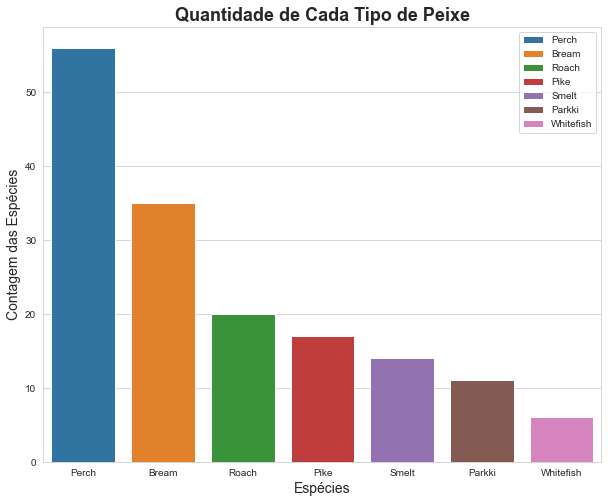

In [15]:
plt.figure(figsize = (10,8))

sns.barplot(x = df_espec_cont.index, y = df_espec_cont.values, hue = df_espec_cont.index, dodge = False)
plt.xlabel('Espécies', fontdict = {'fontsize': '14'})
plt.ylabel('Contagem das Espécies', fontdict = {'fontsize': '14'})
plt.title('Quantidade de Cada Tipo de Peixe', fontdict = {'fontsize': '18'}, fontweight = 'bold')
plt.show()

##### Correlação #####

In [16]:
df.corr()

,Peso,CompVertical,CompDiag,CompCruzado,Altura,Largura
Peso,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
CompVertical,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
CompDiag,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CompCruzado,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Altura,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Largura,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


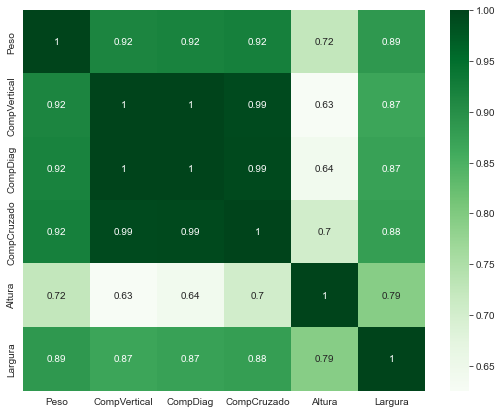

In [17]:
# Mapa de Calor para visuaalização da correlação entre as variáveis

plt.figure(figsize = (9,7))
sns.heatmap(data = df.corr(), cmap = 'Greens', annot = True)
plt.show()

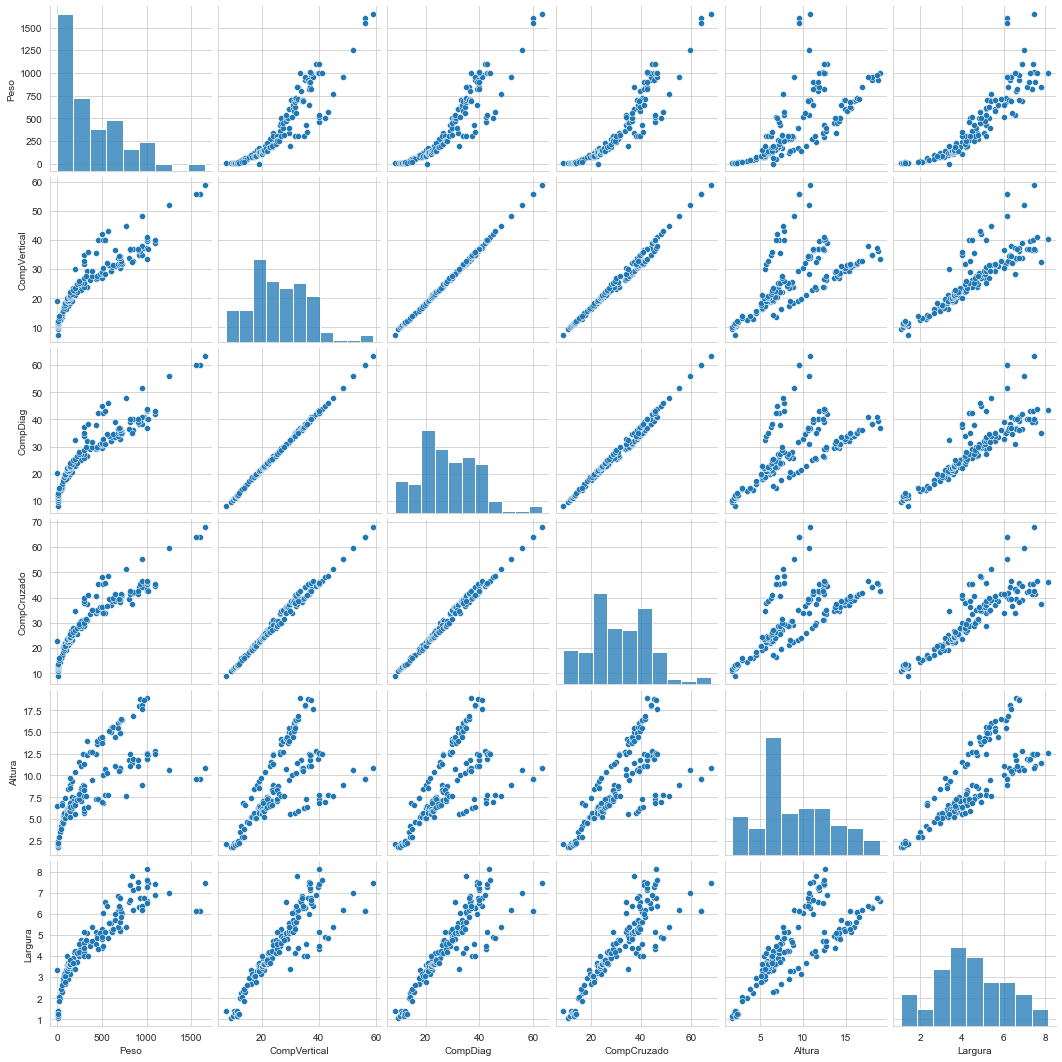

In [18]:
# Visualização da correlação entre as varipaveis
sns.pairplot(df, palette = 'seagreen')

Podemos notar que algumas variáveis preditoras possuem um correlação demasiadamente alta entre si. Essa situação nao é interessante para ML pois possivelmente poderá causar um overfitting no modelo.

O ideal, portanto, deixar apenas uma dessas variáveis que possuem forte correlação, pois elas provavelmente estão trazendo a mesma informação

A decisão a ser tomada aqui será manter a variáveis 'CompDiag' e e retirar as variáveis 'CompVertical' e 'CompCruzado'

In [19]:
df.drop(columns=['CompVertical','CompCruzado'], inplace = True)

In [20]:
df.sample(5)

,Especies,Peso,CompDiag,Altura,Largura
58,Whitefish,540.0,31.0,10.7440,6.562
12,Bream,500.0,31.5,13.7592,4.368
29,Bream,1000.0,37.0,18.9570,6.603
133,Pike,345.0,38.5,6.3960,3.977
94,Perch,150.0,23.0,5.2185,3.626


### Tratamento de Outliers ###

In [21]:
df.describe()

,Peso,CompDiag,Altura,Largura
count,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,8.970994,4.417486
std,357.978317,10.716328,4.286208,1.685804
min,0.000000,8.400000,1.728400,1.047600
25%,120.000000,21.000000,5.944800,3.385650
50%,273.000000,27.300000,7.786000,4.248500
75%,650.000000,35.500000,12.365900,5.584500
max,1650.000000,63.400000,18.957000,8.142000


In [22]:
# Procurando por registros de peixes que tenham peso = 0. Iremos removê-los por nao fazer sentido
df[(df['Peso'])== 0]

,Especies,Peso,CompDiag,Altura,Largura
40,Roach,0.0,20.5,6.4752,3.3516


In [23]:
# Remoção de registro incoerente
df.loc[40]
df.drop(40, inplace = True)
df.reset_index(inplace = True)

In [24]:
df.shape

(158, 6)

In [25]:
df.head(42)

,index,Especies,Peso,CompDiag,Altura,Largura
0,0,Bream,242.0,25.4,11.5200,4.0200
1,1,Bream,290.0,26.3,12.4800,4.3056
2,2,Bream,340.0,26.5,12.3778,4.6961
3,3,Bream,363.0,29.0,12.7300,4.4555
4,4,Bream,430.0,29.0,12.4440,5.1340
5,5,Bream,450.0,29.7,13.6024,4.9274
6,6,Bream,500.0,29.7,14.1795,5.2785
7,7,Bream,390.0,30.0,12.6700,4.6900
8,8,Bream,450.0,30.0,14.0049,4.8438
9,9,Bream,500.0,30.7,14.2266,4.9594


In [26]:
df.drop(columns = [ 'index'], inplace = True)

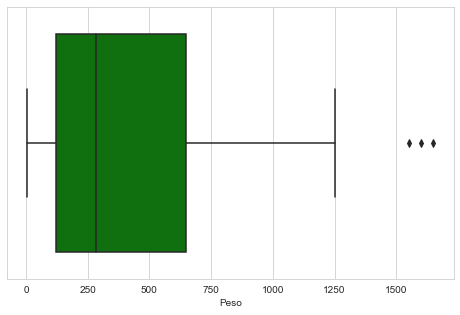

In [27]:
# Boxplot das variáveis
plt.figure(figsize = (8,5))
sns.boxplot(x=df.Peso, color= 'green')

In [28]:
df.Peso.nlargest(8)

143    1650.0
141    1600.0
142    1550.0
140    1250.0
122    1100.0
124    1100.0
120    1015.0
29     1000.0
Name: Peso, dtype: float64

In [29]:
df[(df['Peso']> 1500)]

,Especies,Peso,CompDiag,Altura,Largura
141,Pike,1600.0,60.0,9.600,6.144
142,Pike,1550.0,60.0,9.600,6.144
143,Pike,1650.0,63.4,10.812,7.480


In [30]:
# Utilizando o z-score para classificá-lo como outlier ou não. valores acima de |3| serão considerados outliers
stats.zscore(df.Peso)[141:144]

array([3.36307755, 3.22285029, 3.50330482])

In [31]:
# Irei remover esses registro outliers
df.drop([141,142,143], inplace = True)

In [32]:
# Resetando index
df.reset_index(inplace = True, drop = True)

In [33]:
df.shape

(155, 5)

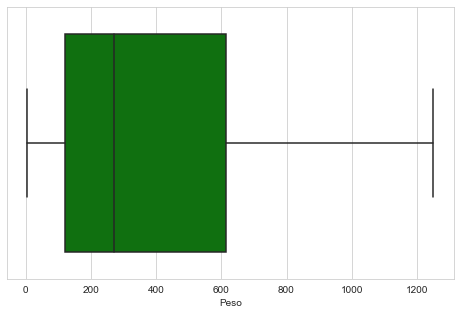

In [34]:
# Visualizando o boxplot novamente
plt.figure(figsize = (8,5))
sns.boxplot(x=df.Peso, color= 'green')

In [35]:
df.columns

Index(['Especies', 'Peso', 'CompDiag', 'Altura', 'Largura'], dtype='object')

c:\Users\rafae\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


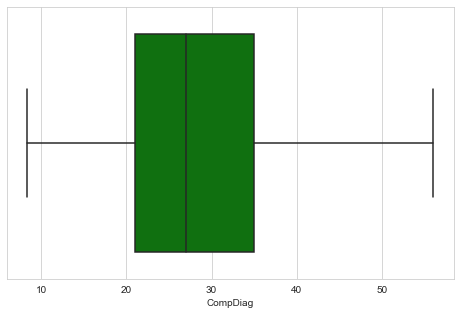

In [36]:
# Boxplot do Comprimento diagonal. Não há outliers
plt.figure(figsize = (8,5))
sns.boxplot(df['CompDiag'], color= 'green')
plt.show()

c:\Users\rafae\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


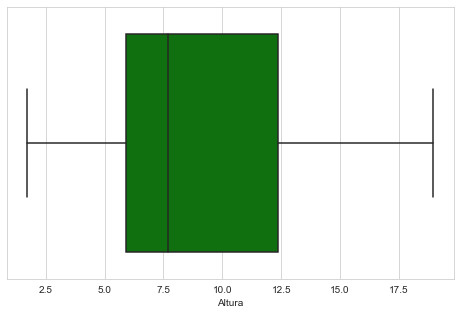

In [37]:
# Boxplot da altura. Não há outliers
plt.figure(figsize = (8,5))
sns.boxplot(df.Altura, color= 'green')
plt.show()

c:\Users\rafae\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


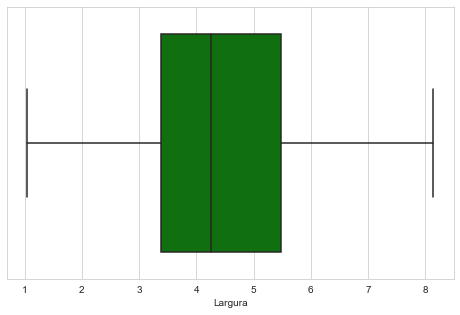

In [38]:
# Boxplot da Largura. Não há outliers
plt.figure(figsize = (8,5))
sns.boxplot(df.Largura, color= 'green')
plt.show()

# Pré-Processamento de dados para construção do Modelo de Machine Learning

### One-Hot Encoding ###

In [39]:
# Aplicando One-Hot Encoding
onehot = pd.get_dummies(df['Especies'], prefix = 'specie')

In [40]:
df = df.join(onehot)
df.head()

,Especies,Peso,CompDiag,Altura,Largura,specie_Bream,specie_Parkki,specie_Perch,specie_Pike,specie_Roach,specie_Smelt,specie_Whitefish
0,Bream,242.0,25.4,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,26.3,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,26.5,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,29.0,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,29.0,12.4440,5.1340,1,0,0,0,0,0,0


In [41]:
# Removendo a variável inicial
df.drop(columns = ['Especies'], inplace = True)
df.sample()

,Peso,CompDiag,Altura,Largura,specie_Bream,specie_Parkki,specie_Perch,specie_Pike,specie_Roach,specie_Smelt,specie_Whitefish
85,120.0,22.0,6.11,3.4075,0,0,1,0,0,0,0


### Separando os dados em treino e teste ###

In [42]:
df.sample(5)

,Peso,CompDiag,Altura,Largura,specie_Bream,specie_Parkki,specie_Perch,specie_Pike,specie_Roach,specie_Smelt,specie_Whitefish
102,260.0,27.5,7.1672,4.3350,0,0,1,0,0,0,0
2,340.0,26.5,12.3778,4.6961,1,0,0,0,0,0,0
20,575.0,34.0,15.1285,5.5695,1,0,0,0,0,0,0
119,900.0,40.0,11.7300,7.2250,0,0,1,0,0,0,0
94,170.0,23.5,6.2750,3.7250,0,0,1,0,0,0,0


In [43]:
X = df.loc[:, df.columns != 'Peso']

In [44]:
Y = df.Peso

In [45]:
print(X[:5])

   CompDiag   Altura  Largura  specie_Bream  specie_Parkki  specie_Perch  \
0      25.4  11.5200   4.0200             1              0             0   
1      26.3  12.4800   4.3056             1              0             0   
2      26.5  12.3778   4.6961             1              0             0   
3      29.0  12.7300   4.4555             1              0             0   
4      29.0  12.4440   5.1340             1              0             0   

   specie_Pike  specie_Roach  specie_Smelt  specie_Whitefish  
0            0             0             0                 0  
1            0             0             0                 0  
2            0             0             0                 0  
3            0             0             0                 0  
4            0             0             0                 0  


In [46]:
print(Y[:5])

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Peso, dtype: float64


In [47]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.3)

In [48]:
print(X_treino.shape)
print(X_teste.shape)

(108, 10)
(47, 10)


### Padronização ###

Distribuição das variáveis

In [49]:
df.columns

Index(['Peso', 'CompDiag', 'Altura', 'Largura', 'specie_Bream',
       'specie_Parkki', 'specie_Perch', 'specie_Pike', 'specie_Roach',
       'specie_Smelt', 'specie_Whitefish'],
      dtype='object')

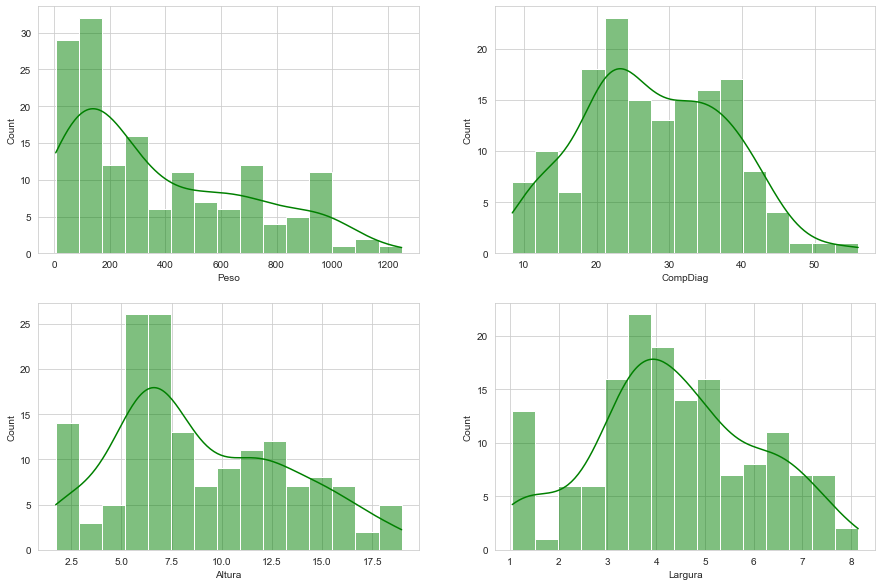

In [50]:
plt.figure(figsize = (15,10))
colunas = ['Peso', 'CompDiag', 'Altura', 'Largura']

for i in range(0, len(colunas)):
    
    plt.subplot(2, 2, i+1)

    sns.histplot(data = df, x = df[colunas[i]] ,color = 'green', kde= True, bins = 15 )

In [51]:
# Padronizar os dados
scaler = StandardScaler()

In [52]:
scaler.fit(X_treino)

StandardScaler()

In [53]:
X_treino = scaler.transform(X_treino)

In [54]:
X_teste = scaler.transform(X_teste)

In [55]:
X_treino[:5]

array([[-1.38229746, -1.22417854, -1.37732364, -0.52018096, -0.2632621 ,
         1.30384048, -0.31943828, -0.40160966, -0.31943828, -0.16903085],
       [-1.14118349, -0.98038764, -1.0110591 , -0.52018096, -0.2632621 ,
         1.30384048, -0.31943828, -0.40160966, -0.31943828, -0.16903085],
       [ 1.15422151,  0.8034728 ,  1.78677573, -0.52018096, -0.2632621 ,
         1.30384048, -0.31943828, -0.40160966, -0.31943828, -0.16903085],
       [ 0.67199357,  1.71487148,  0.97061508,  1.92240791, -0.2632621 ,
        -0.76696499, -0.31943828, -0.40160966, -0.31943828, -0.16903085],
       [ 0.67199357,  1.71528376,  0.99192839,  1.92240791, -0.2632621 ,
        -0.76696499, -0.31943828, -0.40160966, -0.31943828, -0.16903085]])

In [56]:
X_teste[:5]

array([[-0.58179908, -0.74044462, -0.49363225, -0.52018096, -0.2632621 ,
         1.30384048, -0.31943828, -0.40160966, -0.31943828, -0.16903085],
       [-1.68127879, -1.63636015, -1.87007802, -0.52018096, -0.2632621 ,
        -0.76696499, -0.31943828, -0.40160966,  3.13049517, -0.16903085],
       [ 1.00955312, -0.56728987, -0.23184924, -0.52018096, -0.2632621 ,
        -0.76696499,  3.13049517, -0.40160966, -0.31943828, -0.16903085],
       [-0.07063746, -0.12592848,  0.440157  , -0.52018096, -0.2632621 ,
         1.30384048, -0.31943828, -0.40160966, -0.31943828, -0.16903085],
       [ 1.63644945, -0.43811092,  0.30040426, -0.52018096, -0.2632621 ,
        -0.76696499,  3.13049517, -0.40160966, -0.31943828, -0.16903085]])

### Criação do Modelo de Regressão Linear

In [57]:
modelo1 = LinearRegression()

In [58]:
# Treinando o modelo
modelo1.fit(X_treino, Y_treino)

LinearRegression()

In [59]:
# Coeficientes
coef = modelo1.coef_
pd.DataFrame(data = coef, index = X.columns, columns= ['Coeficientes'])


,Coeficientes
CompDiag,144.912150
Altura,180.029730
Largura,99.619990
specie_Bream,-66.870150
specie_Parkki,-16.042723
specie_Perch,13.824946
specie_Pike,3.761026
specie_Roach,-2.958338
specie_Smelt,84.407743
specie_Whitefish,0.710479


### Avaliando o Modelo

In [60]:
pred1 = modelo1.predict(X_teste)

In [61]:
pred1[:5]

array([153.16166455, -42.0069293 , 425.36627304, 430.89044572,
       592.49030602])

Text(0, 0.5, 'Valores Previstos de Y')

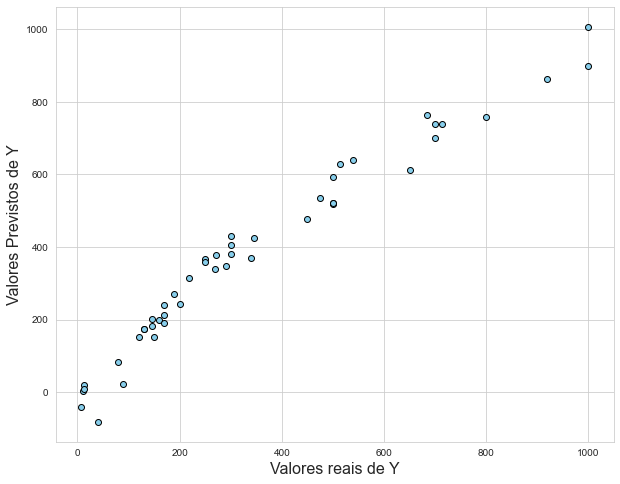

In [62]:
# Plot dos dados previstos com os reais
plt.figure(figsize = (10,8))

plt.scatter(x = Y_teste, y = pred1,color = 'skyblue', edgecolors='black')
plt.xlabel('Valores reais de Y', fontdict={'fontsize': 16})
plt.ylabel('Valores Previstos de Y', fontdict={'fontsize': 16})

A partir do Scatterplot podemos notar que ouve uma relação significativa entre os valores previstos e os valores reais

#### Outras Métricas para Avaliar o Modelo

In [63]:
print(f'Média dos Pesos: {df.Peso.mean()}')
print(f'Peso Mínimo: {df.Peso.min()}')
print(f'Peso Máximo: {df.Peso.max()}')

Média dos Pesos: 377.638064516129
Peso Mínimo: 5.9
Peso Máximo: 1250.0


In [64]:
# MAE - Mean Absolute Error
mean_absolute_error(Y_teste, pred1)

55.38918017367528

> a Média dos erros absolutos foi de aprox 63, que singifica aproximadamente a 17% da média

In [65]:
# Mean Squared Error
mean_squared_error(Y_teste, pred1)

4430.900576162696

In [66]:
# RMSE - Root Mean Squared Error
np.sqrt(mean_squared_error(Y_teste, pred1))

66.56501014919697

> Obtivemos um valor relativamente alto demais. Ele quer dizer que as previsões estão erradas em aprox 91 gramas

In [67]:
# Coeficiente R2
r2_score(Y_teste, pred1)

0.9377469990225841

Coeficiente R2 vai de 0 a 1 e quanto mais próximo a 1, melhor foi nosso resultado.



Obtivemos, portanto, um r2 score de aproximandamente 93%, o que é excelente

#### Resíduos

In [68]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

[(0.0, 0.008)]

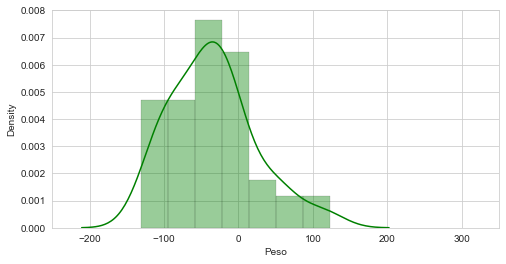

In [72]:
# Plot.
plt.figure(figsize=(8,4))
ax = sns.distplot((Y_teste - pred1),
                  
                  color = 'green',
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))

ax.set(xlim = (-250, 350))
ax.set(ylim = (0, 0.008))
                

Os resíduos são aproximadamente normalmente distríbuidos, o que indica um bom ajuste do modelo